# RSI - Strategy - Backtesting 

### Import Library

In [21]:
import numpy as np
import pandas as pd
import numpy as np
import pandas_ta as ta
from backtesting.backtesting import Backtest, Strategy

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120
import warnings
warnings.filterwarnings('ignore')
# from backtesting._plotting import set_bokeh_output
# set_bokeh_output(notebook=False)
from backtesting import set_bokeh_output
set_bokeh_output(notebook=False)

### Load Price Data

In [22]:
import os
from pathlib import Path
notebook_path = os.getcwd()
algo_dir = Path(notebook_path).parent.parent
csv_file = str(algo_dir) + '/vn-stock-data/VN30ps/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    print('remote')
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [23]:
data = dataset.copy()

In [24]:
# data = data[(data.index > '2020-11-01 00:00:00') & (data.index < '2024-10-01 00:00:00')]
data = data[data.index > '2024-01-01 00:00:00']

In [25]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2024-01-02 09:00:00,1138.5,1139.7,1138.5,1138.9,6206
2024-01-02 09:05:00,1138.9,1139.0,1138.6,1139.0,1424
2024-01-02 09:10:00,1139.0,1141.5,1138.9,1141.4,6265
2024-01-02 09:15:00,1141.3,1141.8,1140.3,1140.8,3739
2024-01-02 09:20:00,1140.7,1141.2,1140.2,1140.2,1943
...,...,...,...,...,...
2024-11-28 14:15:00,1306.1,1307.3,1305.6,1306.9,7726
2024-11-28 14:20:00,1306.9,1307.6,1306.0,1307.6,5086
2024-11-28 14:25:00,1307.6,1308.6,1307.4,1307.9,7291


In [26]:
def get_signal(r):
    signal = ''
    if r['RSI'] < 30:
        signal = 'long'
    elif r['RSI'] > 70:
        signal = 'short'
    return signal

In [27]:
def prepare_data(data):
    data['max_in_range'] = data['High'].rolling(10).max()
    data['min_in_range'] = data['Low'].rolling(10).min()
    data['RSI'] = ta.rsi(data["Close"], length=14)
    data['signal'] = data.apply(lambda r: get_signal(r), axis=1)
    return data

In [28]:
prepared_data = prepare_data(data)
prepared_data.dropna(inplace=True)

In [29]:
prepared_data

,Open,High,Low,Close,Volume,max_in_range,min_in_range,RSI,signal
Date,,,,,,,,,
2024-01-02 10:10:00,1139.9,1140.1,1139.6,1139.9,1123,1140.9,1139.3,52.106353,
2024-01-02 10:15:00,1139.9,1140.2,1139.7,1140.1,873,1140.9,1139.3,54.378964,
2024-01-02 10:20:00,1140.2,1140.8,1140.0,1140.0,2152,1140.9,1139.3,53.024163,
2024-01-02 10:25:00,1140.0,1140.0,1139.4,1139.9,1638,1140.9,1139.4,51.638669,
2024-01-02 10:30:00,1139.9,1139.9,1137.0,1138.0,6624,1140.9,1137.0,33.648515,
...,...,...,...,...,...,...,...,...,...
2024-11-28 14:15:00,1306.1,1307.3,1305.6,1306.9,7726,1311.1,1305.2,36.878302,
2024-11-28 14:20:00,1306.9,1307.6,1306.0,1307.6,5086,1311.1,1305.2,40.648838,
2024-11-28 14:25:00,1307.6,1308.6,1307.4,1307.9,7291,1311.1,1305.2,42.241231,


In [30]:
prepared_data[prepared_data.signal != ''].tail(20)

,Open,High,Low,Close,Volume,max_in_range,min_in_range,RSI,signal
Date,,,,,,,,,
2024-11-26 10:30:00,1309.1,1311.2,1308.6,1310.7,7784,1311.2,1304.2,77.537255,short
2024-11-26 10:35:00,1310.8,1311.2,1309.3,1311.2,3693,1311.2,1304.2,78.429020,short
2024-11-26 10:40:00,1310.8,1311.3,1310.4,1310.6,2823,1311.3,1304.2,74.601639,short
2024-11-26 10:45:00,1310.6,1310.9,1309.5,1309.9,3232,1311.3,1304.2,70.291800,short
2024-11-26 10:50:00,1310.1,1310.1,1309.5,1310.0,2882,1311.3,1305.0,70.553517,short
2024-11-28 09:00:00,1310.1,1318.7,1309.6,1315.6,14521,1318.7,1306.6,80.916654,short
2024-11-28 09:05:00,1315.7,1316.4,1315.0,1316.0,5063,1318.7,1306.6,81.511744,short
2024-11-28 09:10:00,1315.9,1316.3,1315.0,1316.2,4441,1318.7,1306.6,81.817058,short
2024-11-28 09:15:00,1316.2,1317.4,1315.8,1316.5,5479,1318.7,1306.6,82.289511,short


In [31]:
class MainStrategy(Strategy):
    max_sl = 2.1
    trailing_sl = 4.1
    tp_step = 10
    def init(self):
        super().init()

    def next(self):
        super().next()
        close_price = self.data.Close[-1]
        if self.position.is_long:
            max_in_range = self.data.max_in_range[-1]
            if close_price < max_in_range - self.trailing_sl:
                self.position.close()
        elif self.position.is_short:
            min_in_range = self.data.min_in_range[-1]
            if close_price > min_in_range + self.trailing_sl:
                self.position.close()
 
        signal = self.data.signal[-1]
        if self.position:
            if signal == 'long' and self.position.is_short:
                self.position.close()
                buy_price = close_price
                sl = buy_price - self.max_sl
                tp = buy_price + self.tp_step
                self.buy(size=1, sl=sl, tp=tp)
            elif signal == 'short' and self.position.is_long:
                sell_price = close_price
                self.position.close()
                sl = sell_price + self.max_sl
                tp = sell_price - self.tp_step
                self.sell(size=1, sl=sl, tp=tp)
        else:
            if signal == 'long':
                buy_price = close_price
                sl = buy_price - self.max_sl
                tp = buy_price + self.tp_step
                self.buy(size=1, sl=sl, tp=tp)
            elif signal == 'short':
                sell_price = close_price
                sl = sell_price + self.max_sl
                tp = sell_price - self.tp_step
                self.sell(size=1, sl=sl, tp=tp)

In [32]:
bt = Backtest(prepared_data, MainStrategy, commission=.0003, exclusive_orders=True)
stats = bt.run()

In [33]:
stats

Start                     2024-01-02 10:10:00
End                       2024-11-28 14:45:00
Duration                    331 days 04:35:00
Exposure Time [%]                   33.797698
Equity Final [$]                   9610.36726
Equity Peak [$]                       10000.0
Return [%]                          -3.896327
Buy & Hold Return [%]                14.52759
Return (Ann.) [%]                   -4.275234
Volatility (Ann.) [%]                0.925716
Sharpe Ratio                        -4.618298
Sortino Ratio                       -4.861785
Calmar Ratio                        -1.019048
Max. Drawdown [%]                   -4.195323
Avg. Drawdown [%]                   -4.195323
Max. Drawdown Duration      331 days 04:00:00
Avg. Drawdown Duration      331 days 04:00:00
# Trades                                 1021
Win Rate [%]                        32.908913
Best Trade [%]                       1.467423
Worst Trade [%]                     -0.580959
Avg. Trade [%]                    

In [34]:
stats['_trades'].tail(20)

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Tag,Duration
1001,-1,11305,11306,1296.31099,1295.6,0.71099,0.000548,2024-11-22 09:15:00,2024-11-22 09:20:00,None,0 days 00:05:00
1002,-1,11307,11308,1298.01048,1296.5,1.51048,0.001164,2024-11-22 09:25:00,2024-11-22 09:30:00,None,0 days 00:05:00
1003,-1,11309,11310,1296.71087,1295.8,0.91087,0.000702,2024-11-22 09:35:00,2024-11-22 09:40:00,None,0 days 00:05:00
1004,-1,11311,11328,1296.31099,1296.0,0.31099,0.000240,2024-11-22 09:45:00,2024-11-22 11:10:00,None,0 days 01:25:00
1005,-1,11338,11348,1300.50973,1295.7,4.80973,0.003698,2024-11-22 13:25:00,2024-11-22 14:15:00,None,0 days 00:50:00
1006,-1,11410,11411,1304.80844,1305.0,-0.19156,-0.000147,2024-11-26 09:30:00,2024-11-26 09:35:00,None,0 days 00:05:00
1007,-1,11412,11413,1304.70847,1305.0,-0.29153,-0.000223,2024-11-26 09:40:00,2024-11-26 09:45:00,None,0 days 00:05:00
1008,-1,11415,11416,1305.30829,1304.5,0.80829,0.000619,2024-11-26 09:55:00,2024-11-26 10:00:00,None,0 days 00:05:00
1009,-1,11418,11419,1306.60790,1308.1,-1.49210,-0.001142,2024-11-26 10:10:00,2024-11-26 10:15:00,None,0 days 00:05:00
1010,-1,11420,11422,1307.90751,1309.1,-1.19249,-0.000912,2024-11-26 10:20:00,2024-11-26 10:30:00,None,0 days 00:10:00


In [35]:
stats['_trades']['PnL'].min()

-7.591920000000073

In [36]:
trades = stats['_trades']

In [37]:
trades[trades.PnL < -3.1]

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Tag,Duration
9,-1,86,87,1143.25692,1148.3,-5.04308,-0.004411,2024-01-03 14:30:00,2024-01-03 14:45:00,None,0 days 00:15:00
61,-1,644,649,1174.84744,1181.0,-6.15256,-0.005237,2024-01-18 14:15:00,2024-01-19 09:00:00,None,0 days 18:45:00
110,-1,1358,1361,1217.63460,1224.7,-7.06540,-0.005803,2024-02-07 14:25:00,2024-02-15 09:00:00,None,7 days 18:35:00
137,1,1718,1718,1226.66789,1223.0,-3.66789,-0.002990,2024-02-26 09:00:00,2024-02-26 09:00:00,None,0 days 00:00:00
296,-1,3500,3501,1282.31519,1286.0,-3.68481,-0.002874,2024-04-12 14:30:00,2024-04-12 14:45:00,None,0 days 00:15:00
315,1,3588,3588,1219.66579,1216.4,-3.26579,-0.002678,2024-04-16 13:20:00,2024-04-16 13:20:00,None,0 days 00:00:00
366,-1,4113,4114,1269.61900,1273.0,-3.38100,-0.002663,2024-05-06 14:45:00,2024-05-07 09:00:00,None,0 days 18:15:00
574,1,6511,6538,1316.39480,1312.8,-3.59480,-0.002731,2024-07-11 09:00:00,2024-07-11 11:15:00,None,0 days 02:15:00
726,1,8505,8550,1306.79192,1299.2,-7.59192,-0.005810,2024-09-06 09:30:00,2024-09-09 09:00:00,None,2 days 23:30:00
817,-1,9230,9242,1353.09395,1356.7,-3.60605,-0.002665,2024-09-26 10:35:00,2024-09-26 13:00:00,None,0 days 02:25:00


In [38]:
trades[trades.PnL < -3.1]['PnL'].sum()

-52.46075999999971

In [39]:
len(trades[trades.PnL < -3.1]) * -3.1

-34.1

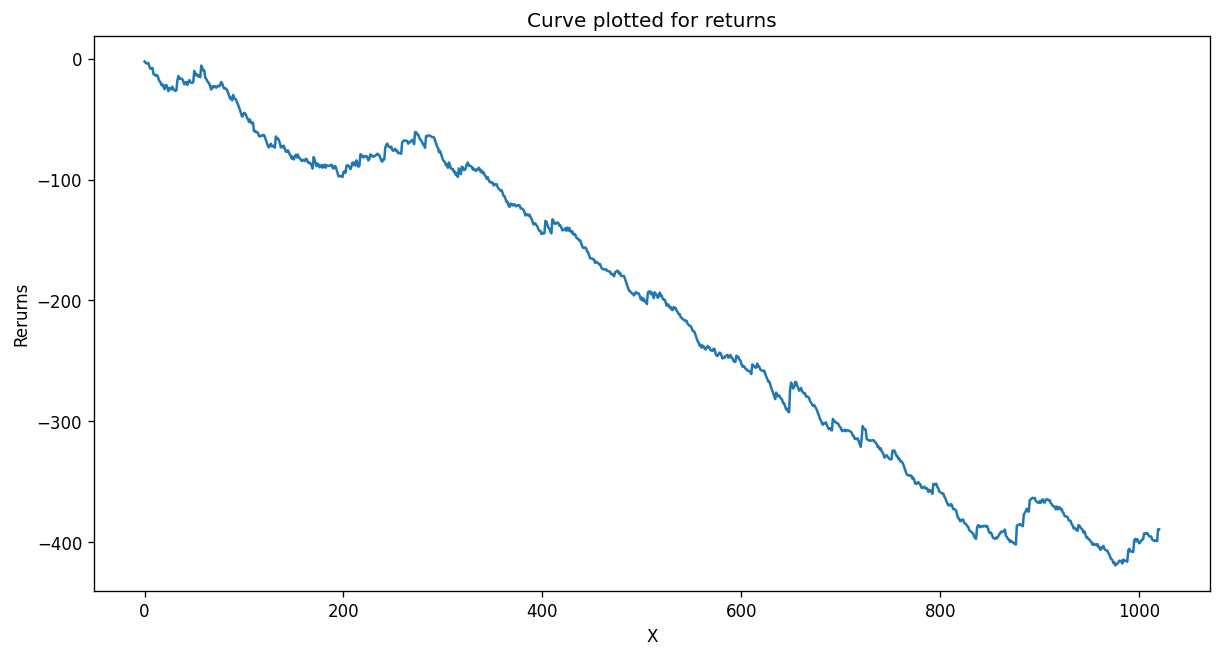

In [40]:
copy_trades = trades.copy()
copy_trades['cum_sum'] = copy_trades['PnL'].cumsum()
X = np.array(range(0, len(copy_trades['cum_sum'])))
Y = copy_trades['cum_sum']
# Plotting the Graph
plt.plot(X, Y)
plt.title("Curve plotted for returns")
plt.xlabel("X")
plt.ylabel("Rerurns")
plt.show()

## Optimize